Null Hypothesis : The average score of 3 students in a section is similar to the average of score of the same number of students picked at random from the class.

Alternate Hypothesis : The average score of 3 students in a particular section is not close to the average of 3 students picked at random from the class.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data_sets/scores_by_section.csv')
df

,Section,Midterm
0,1,22
1,2,12
2,2,23
3,2,14
4,1,20
...,...,...
354,5,24
355,2,16
356,2,17
357,12,16


In [3]:
section_average = df.groupby('Section').mean()
section_average

,Midterm
Section,
1,15.593750
2,15.125000
3,13.666667
4,14.766667
5,17.454545
6,15.031250
7,16.625000
8,16.310345
9,14.566667


Here, we can see that the averages are not evenly distributed, section 8 has a average of 16.310 while section 3 has a average of 13.6667. 

In [4]:
scores = df['Midterm']
scores

0      22
1      12
2      23
3      14
4      20
       ..
354    24
355    16
356    17
357    16
358    14
Name: Midterm, Length: 359, dtype: int64

In [5]:
df.groupby('Section').count()

,Midterm
Section,
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30


Taking random samples from all the section and sampling 27 scores (as the size of section 3 is 27 students)

In [6]:
sampled_scores = scores.sample(n=27, replace=False)
sampled_scores

225    14
64      0
328    17
173     9
259    10
234    20
49     24
179    21
186    12
47      4
215    18
205    25
90     19
152    24
95     15
315    21
193    21
343    20
342    19
93     17
292    22
277    17
34     12
273     4
5      25
69     25
290    13
Name: Midterm, dtype: int64

Then, we can compare the mean score of the 27 students from section 3 vs the mean score of 27 students randomly sampled from the entire data set.

In [7]:
sec_3_avg = scores[3]

print("Section 3 mean : ", scores[3], " randomly sampled mean : ", sampled_scores.mean())

Section 3 mean :  14  randomly sampled mean :  16.59259259259259


It can be observed that the means are much closer than how it initially looked (that the average of class 3 is considerably lower compared to other sections).

Running the simulation multiple times (5000) and plotting average distribution of 27 randomly chosen samples (and class 3 average, denoted by a red circle).

In [8]:
simulations = 10000
mean_scores = []
for i in range(simulations):
    sampled_scores = scores.sample(n=27, replace=False)
    mean_scores.append(sampled_scores.mean())

%matplotlib inline

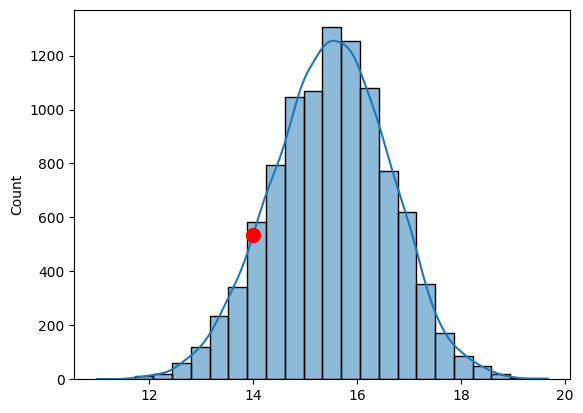

In [20]:
ax = sb.histplot(mean_scores, kde=True, bins=24)
x = ax.lines[0].get_xdata() 
y = ax.lines[0].get_ydata() 
_id = scores[3]

plt.plot(_id, 535,'ro',ms=10)


It can be seen that because the test statistic was very small, we were intially aligning towards rejecting the null hypothesis in favour of the alternative hypothesis. However, the graph shows that the mean of 27 students (i.e size of section 3) is not very different from the mean of 27 students chosen randomly from all sections.

Using P Value test to determine if we should reject or accept the null hypothesis by performing hypothesis testing.

In [10]:
np.count_nonzero(mean_scores <= scores[3])/np.size(mean_scores)

0.0971

It can be observed that there is only a 9.4% chance that the simulated means were above the class 3 mean. Considering value of alpha to be 0.05, we can see that p >= alpha, we can see that the GSI defence holds good. 

This means that the average score of 3 students chosen at random is similar to the average score of section 3. There for we fail to reject the null hypothesis and cannot favour the alternative hypothesis over it.